In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype


In [3]:
df= pd.read_csv('zomato.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'zomato.csv'

In [ ]:
df.head()

In [4]:
df.head(10)

NameError: name 'df' is not defined

In [5]:
df.info()

NameError: name 'df' is not defined

In [7]:
df.describe(include='all')

url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/jalsa-banasha...  Delivery Only   
freq                                                    1            128   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                   name online_order book_table   rate         votes  \
count             51717        51717      51717  43942  51717.000000   
unique             8792            2          2     64           NaN   
top     Cafe Coffee Day          Yes         No    NEW           NaN   
freq                 96        30444      45268   2208           NaN   
mean                NaN          NaN        NaN    NaN    283.697527   
std                 NaN          NaN        NaN    NaN    803.838853   
min                 NaN          NaN        NaN    NaN      0.000000   
25%                 NaN          NaN        NaN    NaN      7.000000   
50%                 NaN          NaN        NaN    NaN     41.000000   
75%                 NaN          NaN        NaN    NaN    198.000000   
max                 NaN          NaN        NaN    NaN  16832.000000   

               phone location    rest_type dish_liked      cuisines  \
count          50509    51696        51490      23639         51672   
unique         14926       93           93       5271          2723   
top     080 43334321      BTM  Quick Bites    Biryani  North Indian   
freq             216     5124        19132        182          2913   
mean             NaN      NaN          NaN        NaN           NaN   
std              NaN      NaN          NaN        NaN           NaN   
min              NaN      NaN          NaN        NaN           NaN   
25%              NaN      NaN          NaN        NaN           NaN   
50%              NaN      NaN          NaN        NaN           NaN   
75%              NaN      NaN          NaN        NaN           NaN   
max              NaN      NaN          NaN        NaN           NaN   

       approx_cost(for two people) reviews_list menu_item listed_in(type)  \
count                        51371        51717     51717           51717   
unique                          70        22513      9098               7   
top                            300           []        []        Delivery   
freq                          7576         7595     39617           25942   
mean                           NaN          NaN       NaN             NaN   
std                            NaN          NaN       NaN             NaN   
min                            NaN          NaN       NaN             NaN   
25%                            NaN          NaN       NaN             NaN   
50%                            NaN          NaN       NaN             NaN   
75%                            NaN          NaN       NaN             NaN   
max                            NaN          NaN       NaN             NaN   

       listed_in(city)  
count            51717  
unique              30  
top                BTM  
freq              3279  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [8]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

## Missing Value

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
missing_count = df.isnull().sum()
value_count= df.isnull().count()
missing_percentage = round(missing_count/value_count*100,2)
missing_df = pd.DataFrame({'count':missing_count,'percentage':missing_percentage})
print(missing_df)

                             count  percentage
url                              0        0.00
address                          0        0.00
name                             0        0.00
online_order                     0        0.00
book_table                       0        0.00
rate                          7775       15.03
votes                            0        0.00
phone                         1208        2.34
location                        21        0.04
rest_type                      227        0.44
dish_liked                   28078       54.29
cuisines                        45        0.09
approx_cost(for two people)    346        0.67
reviews_list                     0        0.00
menu_item                        0        0.00
listed_in(type)                  0        0.00
listed_in(city)                  0        0.00


## Visuals

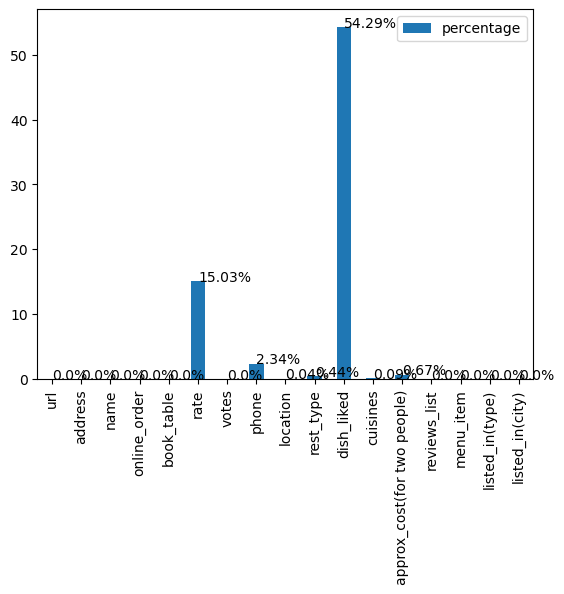

In [11]:
barchart = missing_df.plot.bar(y='percentage')
for i, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+'%')

# 2. Feature Engineering

### 1. title → title_length;

In [12]:
df['title_length'] = df['name'].apply(len)

In [13]:
df['with_phone'] = np.where(df['phone'].isnull(), 'Yes', 'No')


In [14]:
num_list=[]
cat_list=[]
for i in df:
    if is_numeric_dtype(df[i]):
        num_list.append(i)
    elif is_string_dtype(df[i]):
        cat_list.append(i)
        
print(num_list)
print(cat_list)

['votes', 'title_length']
['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)', 'with_phone']


## 3 Univariate Analysis

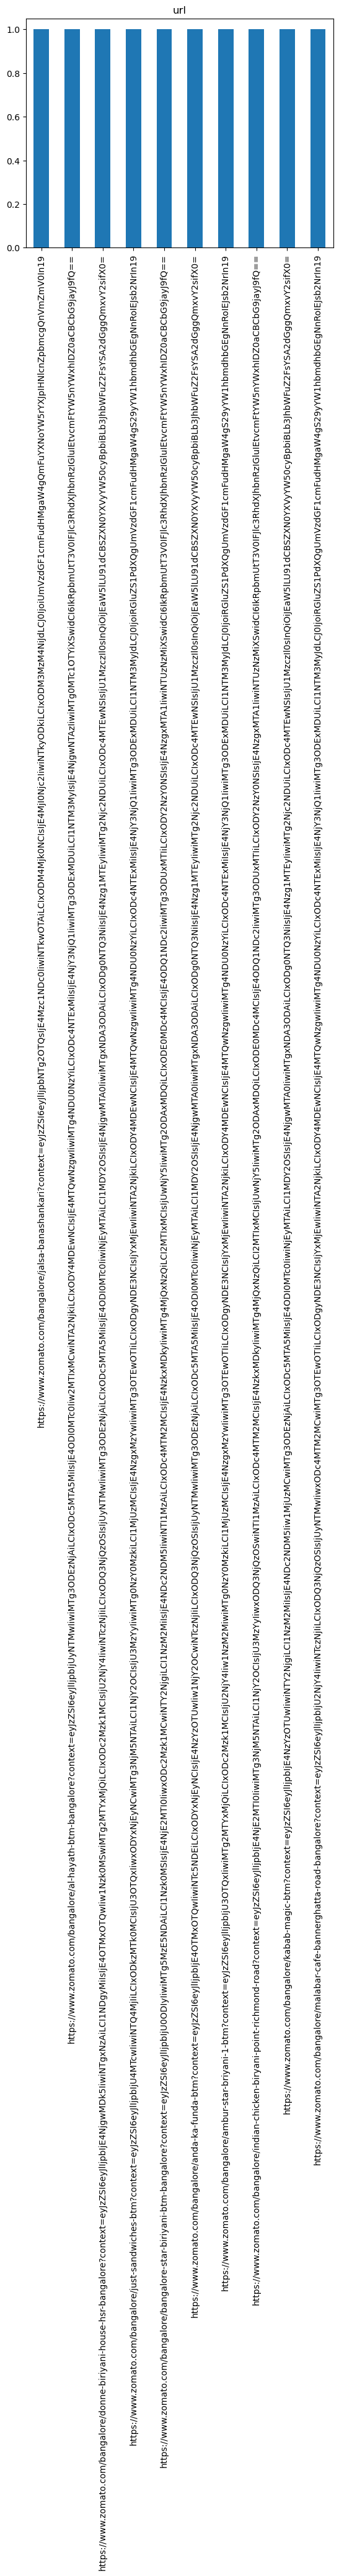

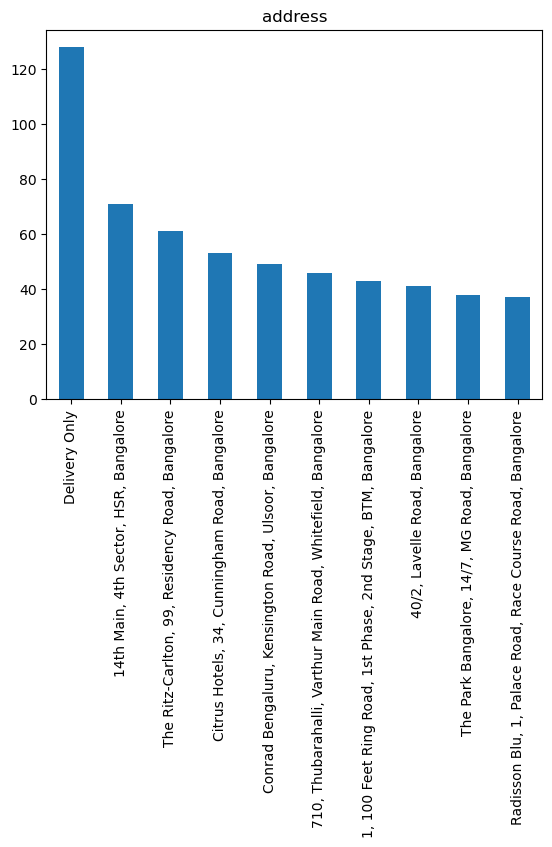

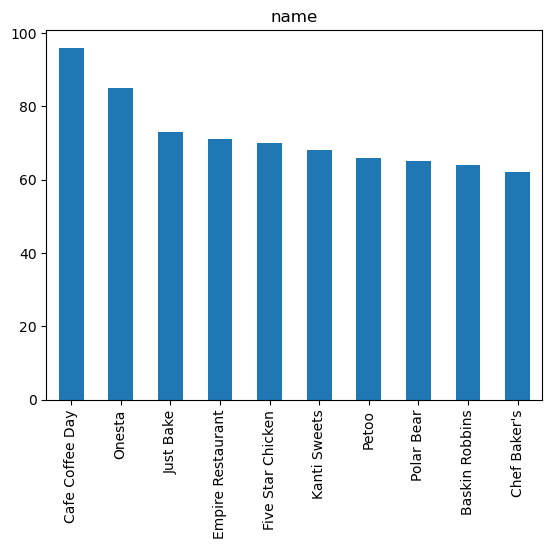

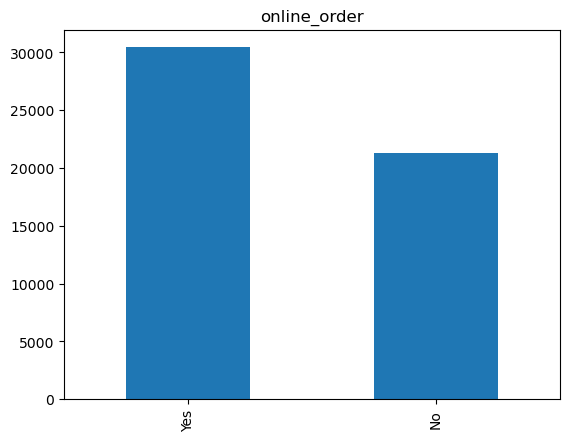

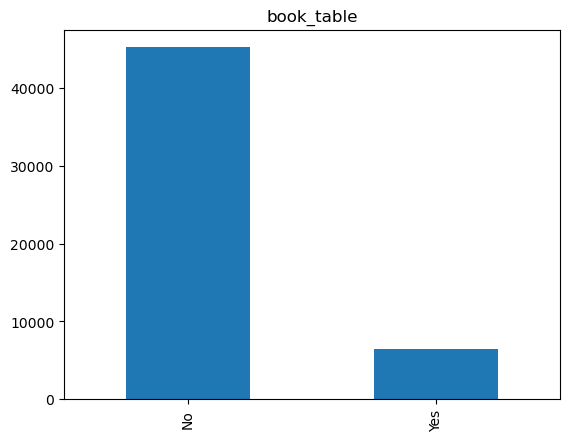

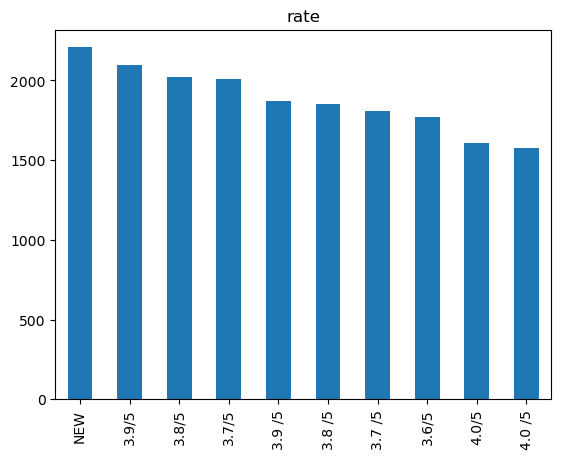

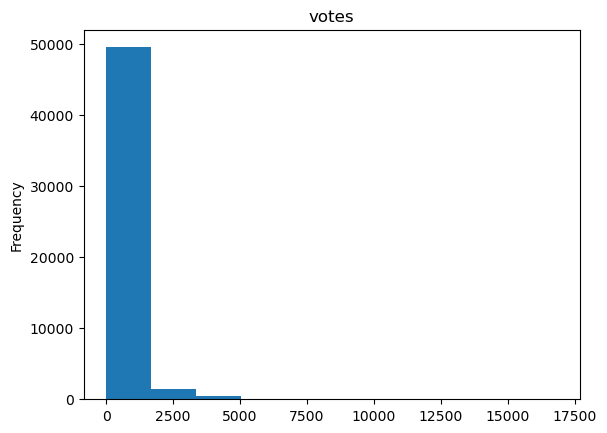

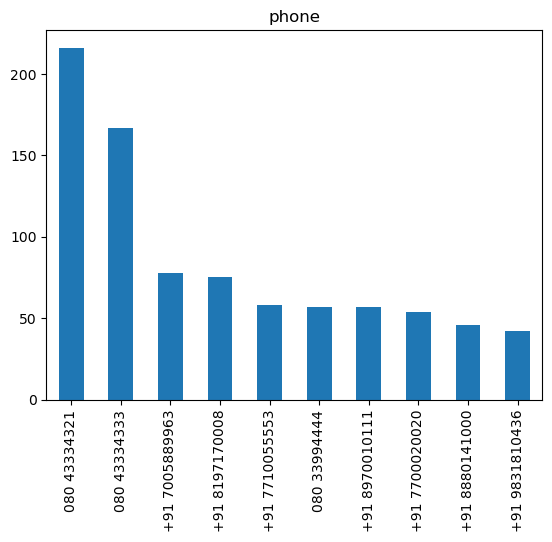

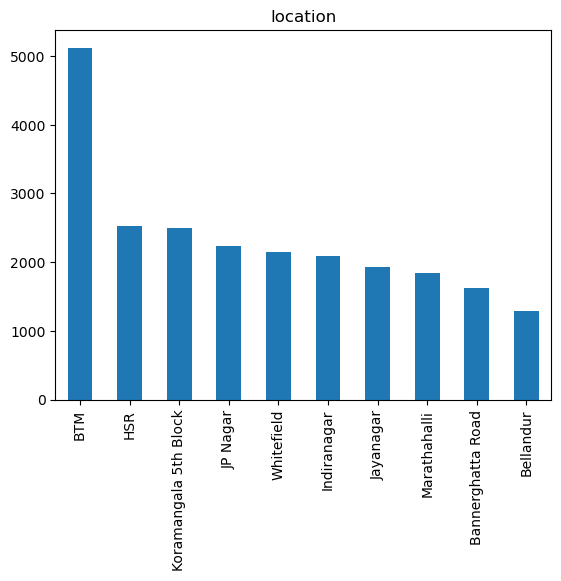

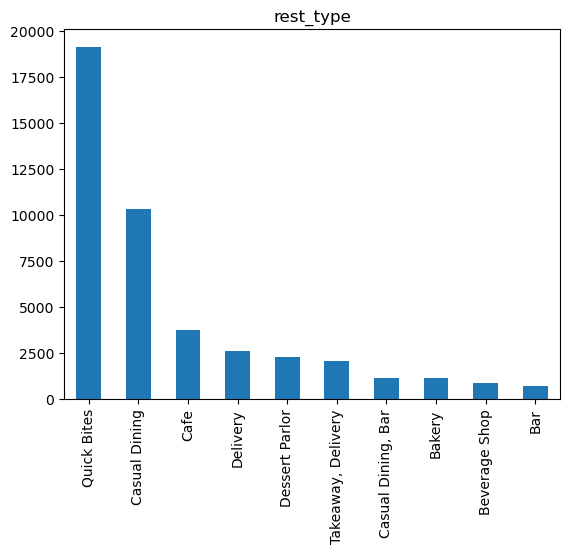

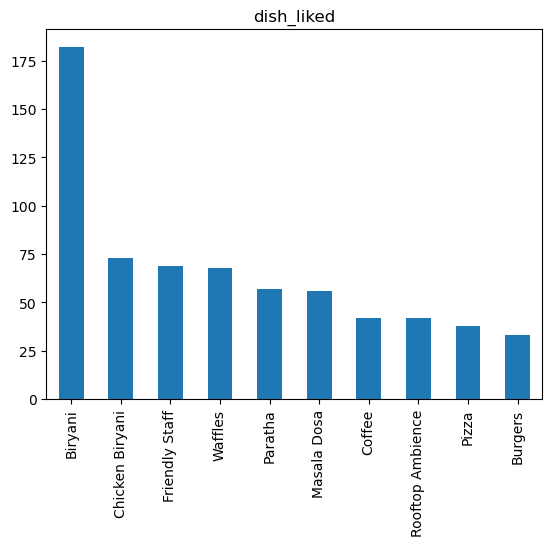

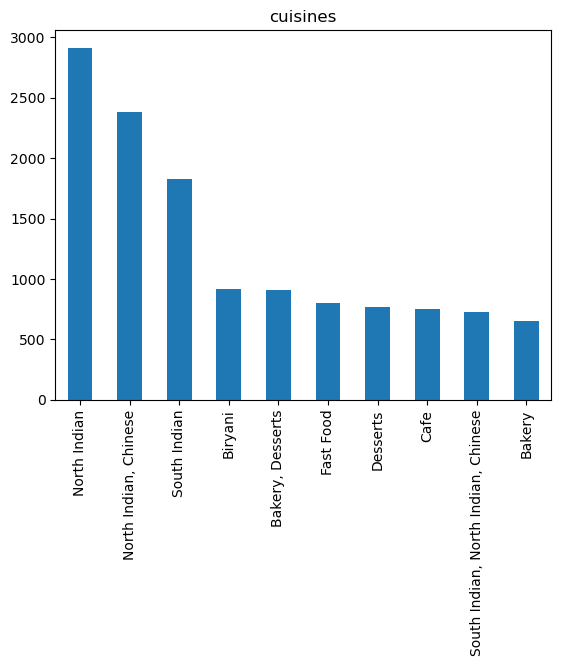

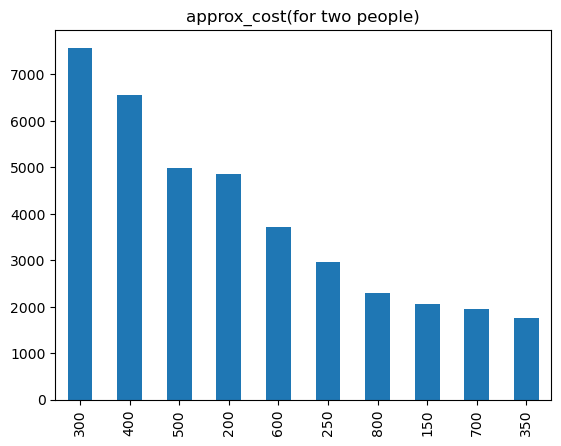

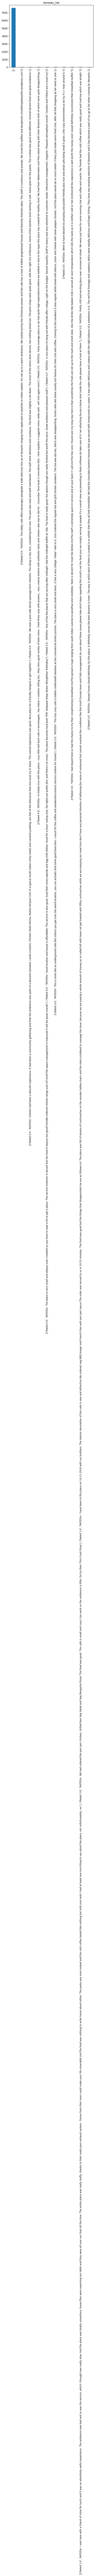

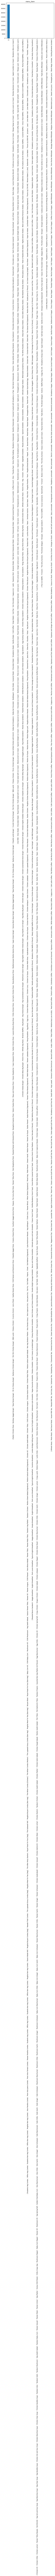

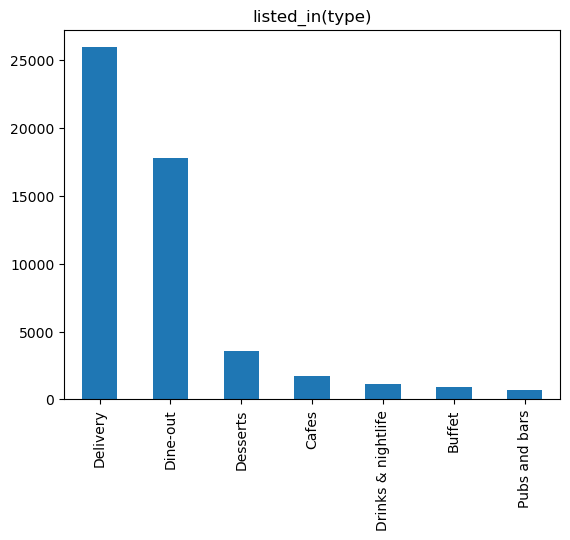

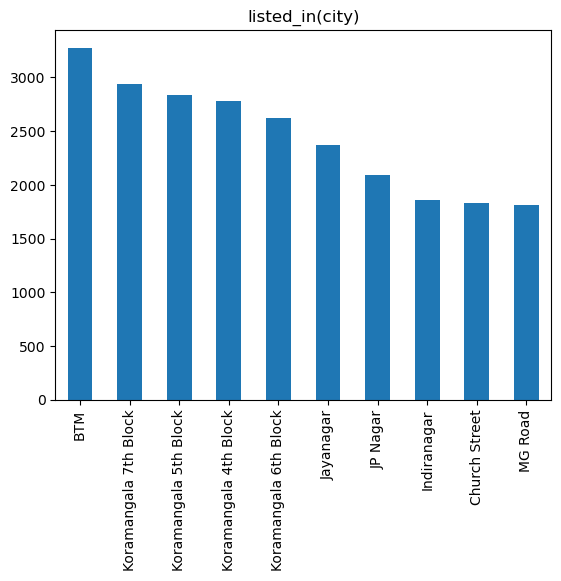

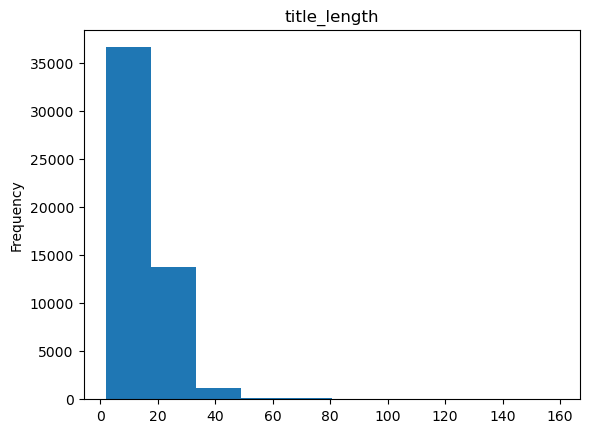

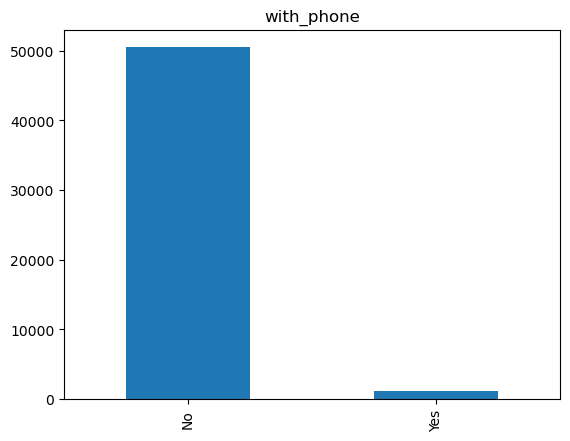

In [15]:
for i in df:
    plt.figure(i)
    plt.title(i)
    if is_numeric_dtype(df[i]):
        df[i].plot(kind='hist')
    elif is_string_dtype(df[i]):
        df[i].value_counts()[:10].plot(kind='bar')

## 4. Multivariate Analysis

### 1. Numerical vs. Numerical → heat map or pairplot

C:\Users\IT Tech\AppData\Local\Temp\ipykernel_9948\577397040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

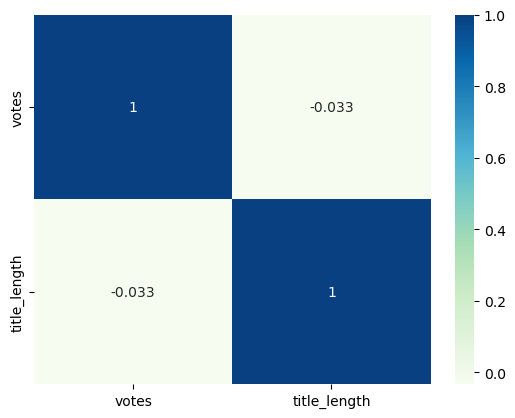

In [16]:
correlation = df.corr()
sns. heatmap(correlation, cmap="GnBu",annot=True)

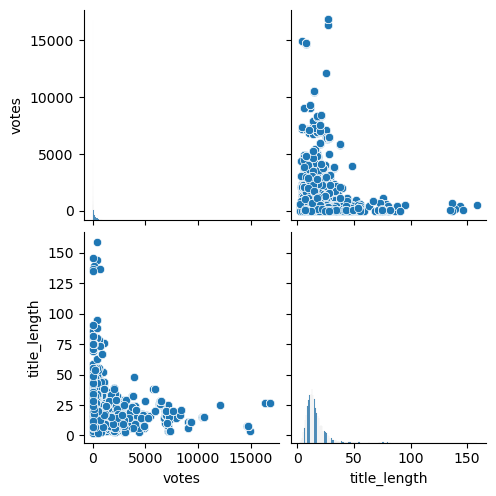

In [17]:
# pairplot

sns.pairplot(df,height=2.5)

### 2. Categorical vs. Categorical → countplot with hue

In [ ]:
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0,len(cat_list)):
        secondary_cat=cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure(figsize=(15,15))
            chart= sns.countplot(
            data=df,
            x=primary_cat,
            hue= secondary_cat,
            palette='GnBu',
            order= df[primary_cat].value_counts().iloc[:10].index)

### 3. Categorical vs. Numerical → boxplot or pairplot with hue

In [ ]:
for i in range(0, len(cat_list)):
    cat= cat_list[i]
    for j in range(0,len(num_list)):
        num= num_list[j]
        plt.figure(figsize=(15,15))
        sns.boxplot(x=cat,y=num,data=df,palette='GnBu')
    

In [ ]:
for i in range(0, len(cat_list)):
    hue_cat=cat_list[i]
    sns.pairplot(df,hue=hue_cat)